# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'



### Step 3. Assign it to a variable apple and apply a head()

In [4]:
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 5. Transform the Date column as a datetime type and check the info()

In [12]:
df.set_index(df['Date'],inplace = True)

### Step 6.  Set the date as the index

In [10]:
df=pd.read_csv(url, index_col="Date")
df.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [172]:
df.index.day_name()

Index(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Friday',
       ...
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Monday', 'Tuesday'],
      dtype='object', name='Date', length=8465)

### Step 9. Get the last business day of each month

In [60]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year']= pd.DatetimeIndex(df['Date']).year

In [67]:
df['month'].unique()
df['year'].unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993,
       1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980])

### Step 10.  What is the difference in days between the first day and the oldest

In [147]:
df[df['month']==1]['Date'].d

,Date,Open,High,Low,Close,Volume,Adj Close,month,year,dayofweek
Date,,,,,,,,,,


In [176]:
df.index.max()- df.index.min()

Timedelta('12261 days 00:00:00')

In [167]:
df.asfreq('BM')

,Open,High,Low,Close,Volume,Adj Close,month,year,dayofweek
Date,,,,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53,12.0,1980.0,Wednesday
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44,1.0,1981.0,Friday
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41,2.0,1981.0,Friday
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38,3.0,1981.0,Tuesday
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44,4.0,1981.0,Thursday
...,...,...,...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76,2.0,2014.0,Friday
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25,3.0,2014.0,Monday
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83,4.0,2014.0,Wednesday


### Step 11.  How many months in the data we have?

In [181]:
df

,Open,High,Low,Close,Volume,Adj Close,month,year,dayofweek
Date,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,12,1980,Friday
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,12,1980,Monday
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,12,1980,Tuesday
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,12,1980,Wednesday
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,12,1980,Thursday
...,...,...,...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,7,2014,Tuesday
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,7,2014,Wednesday
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,7,2014,Thursday


In [15]:
df["month"].unique

KeyError: 'month'

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

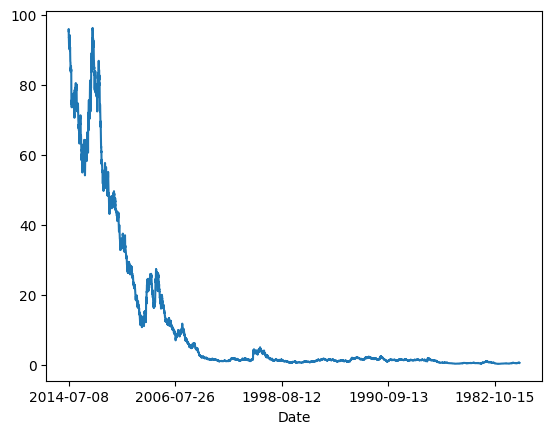

In [16]:
Adj_Close=df["Adj Close"]
Adj_Close.plot();

### BONUS: Create your own question and answer it.